In [40]:
#Imports
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import panel as pn

# Kei - Happiness Score

# Data Cleaning
 1. Load happiness score data from year 2015 to 2021
 2. Clean the data to be the same format for all dataset
 3. Concatinate data into one dataframe

In [2]:
# Load data from year 2015 to 2022 individually
from google.colab import files
uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [3]:
# Create dataframe from year 2015 to 2021
happiness_2015_df = pd.read_csv('2015.csv')
happiness_2016_df = pd.read_csv('2016.csv')
happiness_2017_df = pd.read_csv('2017.csv')
happiness_2018_df = pd.read_csv('2018.csv')
happiness_2019_df = pd.read_csv('2019.csv')
happiness_2020_df = pd.read_csv('2020.csv')
happiness_2021_df = pd.read_csv('2021.csv')
happiness_2022_df = pd.read_csv('2022.csv')

In [4]:
# Add column 'year' to each dataframe
happiness_2015_df['year'] = 2015
happiness_2016_df['year'] = 2016
happiness_2017_df['year'] = 2017
happiness_2018_df['year'] = 2018
happiness_2019_df['year'] = 2019
happiness_2020_df['year'] = 2020
happiness_2021_df['year'] = 2021
happiness_2022_df['year'] = 2022

In [5]:
# Check all dataframes
display(happiness_2015_df.head(2))
display(happiness_2016_df.head(2))
display(happiness_2017_df.head(2))
display(happiness_2018_df.head(2))
display(happiness_2019_df.head(2))
display(happiness_2020_df.head(2))
display(happiness_2021_df.head(2))
display(happiness_2022_df.head(2))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,year
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,year
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",2022
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",2022


In [6]:
# Data cleaning
# === Year 2015 ===
# Drop columns
happiness_2015_df = happiness_2015_df.drop(['Region','Standard Error','Dystopia Residual','Family'],axis=1)

# Rename column name
happiness_2015_df = happiness_2015_df.rename(columns={'Country':'Country name' ,'Happiness Rank': 'RANK', 'Happiness Score':'Happiness score','Economy (GDP per Capita)':'GDP per capita','Trust (Government Corruption)':'Perceptions of corruption',
                                                      'Health (Life Expectancy)':'Healthy life expectancy'})

# === Year 2016 ===
# Drop columns
happiness_2016_df = happiness_2016_df.drop(['Region','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Family'],axis=1)

# Rename column name
happiness_2016_df = happiness_2016_df.rename(columns={'Country':'Country name', 'Happiness Rank': 'RANK', 'Happiness.Score':'Happiness score','Economy (GDP per Capita)':'GDP per capita','Trust (Government Corruption)':'Perceptions of corruption',
                                                      'Health (Life Expectancy)':'Healthy life expectancy','Happiness Score':'Happiness score'})

# === Year 2017 ===
# Drop columns
happiness_2017_df = happiness_2017_df.drop(['Whisker.high','Whisker.low','Dystopia.Residual','Family'],axis=1)

# Rename column name
happiness_2017_df = happiness_2017_df.rename(columns={'Country':'Country name','Happiness.Rank': 'RANK', 'Happiness.Score':'Happiness score','Economy..GDP.per.Capita.':'GDP per capita','Health..Life.Expectancy.':'Healthy life expectancy',
                                                      'Trust..Government.Corruption.':'Perceptions of corruption'})

# === Year 2018 ===
# Drop columns
happiness_2018_df = happiness_2018_df.drop(['Social support'],axis=1)

# Rename column name
happiness_2018_df = happiness_2018_df.rename(columns={'Overall rank': 'RANK', 'Country or region':'Country name','Score':'Happiness score','Freedom to make life choices':'Freedom'})

# === Year 2019 ===
# Drop columns
happiness_2019_df = happiness_2019_df.drop(['Social support'],axis=1)

# Rename column name
happiness_2019_df = happiness_2019_df.rename(columns={'Overall rank': 'RANK', 'Country or region':'Country name','Score':'Happiness score','Freedom to make life choices':'Freedom'})

# === Year 2020 ===
# Add rank
happiness_2020_df.insert(0, 'RANK',happiness_2020_df.index + 1)

# Drop columns
happiness_2020_df = happiness_2020_df.drop(['Regional indicator','Logged GDP per capita','upperwhisker','lowerwhisker','Healthy life expectancy','Standard error of ladder score','Freedom to make life choices','Dystopia + residual',
                                            'Explained by: Social support','Ladder score in Dystopia','Generosity','Perceptions of corruption','Social support'],axis=1)

# Rename column name
happiness_2020_df = happiness_2020_df.rename(columns={'Ladder score':'Happiness score','Explained by: Generosity':'Generosity','Explained by: Freedom to make life choices':'Freedom','Explained by: Perceptions of corruption':'Perceptions of corruption',
                                                      'Explained by: Log GDP per capita':'GDP per capita','Explained by: Healthy life expectancy':'Healthy life expectancy',})

# === Year 2021 ===
# Add rank 
#happiness_2021_df['RANK'] = happiness_2021_df.index + 1
happiness_2021_df.insert(0, 'RANK',happiness_2021_df.index + 1)

# Drop columns
happiness_2021_df = happiness_2021_df.drop(['Regional indicator','upperwhisker','lowerwhisker','Logged GDP per capita','Healthy life expectancy','Standard error of ladder score','Freedom to make life choices','Dystopia + residual',
                                            'Explained by: Social support','Ladder score in Dystopia','Generosity','Perceptions of corruption','Social support'],axis=1)

# Rename column name
happiness_2021_df = happiness_2021_df.rename(columns={'Country or region': 'Country name', 'Ladder score':'Happiness score', 'Explained by: Generosity':'Generosity','Explained by: Freedom to make life choices':'Freedom',
                                                      'Logged GDP per capita':'GDP per capita','Explained by: Perceptions of corruption':'Perceptions of corruption','Explained by: Log GDP per capita':'GDP per capita',
                                                      'Explained by: Healthy life expectancy':'Healthy life expectancy',})

# === Year 2022 ===
# Drop columns
happiness_2022_df = happiness_2022_df.drop(['Whisker-high','Whisker-low','Dystopia (1.83) + residual','Explained by: Social support'],axis=1)

# Rename column name
happiness_2022_df = happiness_2022_df.rename(columns={'Country': 'Country name', 'Explained by: Generosity':'Generosity','Explained by: Freedom to make life choices':'Freedom',
                                                      'Explained by: GDP per capita':'GDP per capita','Explained by: Perceptions of corruption':'Perceptions of corruption',
                                                      'Explained by: Healthy life expectancy':'Healthy life expectancy',})

In [7]:
# Check all dataframes after data cleaning
display(happiness_2015_df.head(2))
display(happiness_2016_df.head(2))
display(happiness_2017_df.head(2))
display(happiness_2018_df.head(2))
display(happiness_2019_df.head(2))
display(happiness_2020_df.head(2))
display(happiness_2021_df.head(2))
display(happiness_2022_df.head(2))

,Country name,RANK,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015


,Country name,RANK,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,year
0,Denmark,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083,2016


,Country name,RANK,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.355280,0.400770,2017


,RANK,Country name,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,0.861,0.686,0.286,0.340,2018


,RANK,Country name,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410,2019


,RANK,Country name,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.8087,1.285190,0.961271,0.662317,0.159670,0.477857,2020
1,2,Denmark,7.6456,1.326949,0.979333,0.665040,0.242793,0.495260,2020


,RANK,Country name,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.842,1.446,0.741,0.691,0.124,0.481,2021
1,2,Denmark,7.620,1.502,0.763,0.686,0.208,0.485,2021


,RANK,Country name,Happiness score,GDP per capita,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,"7,821","1,892","0,775","0,736","0,109","0,534",2022
1,2,Denmark,"7,636","1,953","0,777","0,719","0,188","0,532",2022


In [8]:
# Concatinate all dataframe
happiness_df = pd.concat([happiness_2015_df,happiness_2016_df,happiness_2017_df,happiness_2018_df,happiness_2019_df,happiness_2020_df,happiness_2021_df,happiness_2021_df], axis=0, ignore_index=True)

# Sort by Country name and year
happiness_df.sort_values(by=['Country name', 'year'], inplace=True)

# reset index
happiness_df.reset_index(drop=True, inplace=True)

# print the sorted dataframe
happiness_df.loc[:, ['Country name', 'Happiness score', 'year']]

,Country name,Happiness score,year
0,Afghanistan,3.5750,2015
1,Afghanistan,3.3600,2016
2,Afghanistan,3.7940,2017
3,Afghanistan,3.6320,2018
4,Afghanistan,3.2030,2019
...,...,...,...
1228,Zimbabwe,3.6920,2018
1229,Zimbabwe,3.6630,2019
1230,Zimbabwe,3.2992,2020
1231,Zimbabwe,3.1450,2021


# Choose Top 20 countries from the dataset
 Create a dataframe that has top 20 countries from the year 2015 to 2022.  
 How: Calculate mean for each country and sort it out by descending order based on happiness score. This will be the dataset for the machine learning

In [9]:
# Create dataframe to get mean for each country

# group by country and calculate mean of each column
grouped_df = happiness_df.groupby('Country name').mean()

# sort by country
grouped_df.sort_values(by='Happiness score', ascending=False, inplace=True)

# print the top 20 aggregated dataframe
top_20_countries_df = grouped_df.loc[:,['Happiness score']].head(20).reset_index()

# Show the dataframe
top_20_countries_df

,Country name,Happiness score
0,Finland,7.647712
1,Denmark,7.576950
2,Switzerland,7.532362
3,Iceland,7.520938
4,Norway,7.497125
5,Netherlands,7.424988
6,Sweden,7.334437
7,New Zealand,7.302325
8,Canada,7.273887
9,Australia,7.246225


<Axes: title={'center': 'Top 20 Happiest countries between 2015 and 2022'}, xlabel='Country', ylabel='Happiness score'>

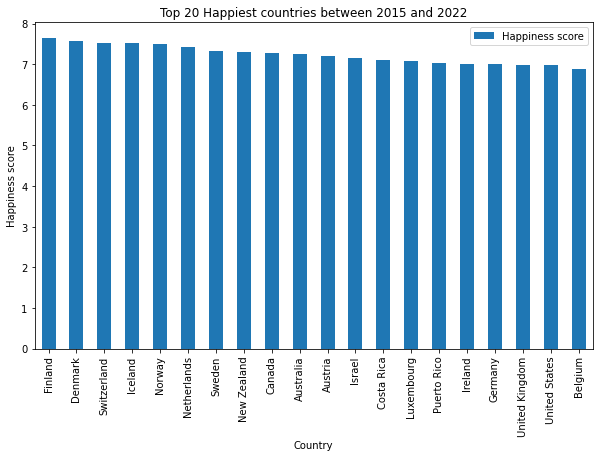

In [48]:
# Show 
top_20_countries_df.plot(kind='bar', x='Country name',title='Top 20 Happiest countries between 2015 and 2022', 
                          xlabel='Country', ylabel='Happiness score', figsize=(10,6))


In [13]:
# Make a list of top 20 countrie names

# extract the Country name column as a list
country_list = top_20_countries_df['Country name'].tolist()

# Create dataframe of top 20 countries based on average happiness score from 2015 to 2022
# create a boolean mask based on the Country name column
mask = happiness_df['Country name'].isin(country_list)

# filter the original dataframe using the boolean mask
filtered_df = happiness_df[mask]

# print the filtered dataframe
top_20_happycountries_df = filtered_df[['Country name','Happiness score','year']]

# Show the dataframe
top_20_happycountries_df.head(20)

,Country name,Happiness score,year
44,Australia,7.2840,2015
45,Australia,7.3130,2016
46,Australia,7.2840,2017
47,Australia,7.2720,2018
48,Australia,7.2280,2019
49,Australia,7.2228,2020
50,Australia,7.1830,2021
51,Australia,7.1830,2021
52,Austria,7.2000,2015
53,Austria,7.1190,2016


# Data Modeling

In [14]:
# encode Country name column using one-hot encoding
onehot_df = pd.get_dummies(top_20_happycountries_df['Country name'])

# combine one-hot encoded features with the Happiness Score and year columns
features_df = pd.concat([onehot_df, top_20_happycountries_df['year'], top_20_happycountries_df['Happiness score']], axis=1)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df.drop(['Happiness score'], axis=1), features_df['Happiness score'], test_size=0.2, random_state=42) # (X, y, test_size, random_state)

# create XGBoost model and train on the training set
happy_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
happy_xgb_model.fit(X_train, y_train)

# evaluate model on the testing set
y_pred = happy_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.004118359229529831


In [15]:
features_df

,Australia,Austria,Belgium,Canada,Costa Rica,Denmark,Finland,Germany,Iceland,Ireland,...,Netherlands,New Zealand,Norway,Puerto Rico,Sweden,Switzerland,United Kingdom,United States,year,Happiness score
44,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015,7.2840
45,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,7.3130
46,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017,7.2840
47,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,7.2720
48,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2019,7.2280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2018,6.8860
1173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2019,6.8920
1174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2020,6.9396
1175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021,6.9510


# Prediction
This will take a range of years to predict top 20 countries
Prediction function parameter should take start and end year.
For example, if you want to know top 3 countries for next three years. This means you need to predict 2022, 2023 and 2024. Then return top 3 countries with mean of these three years. 

In [ ]:
# This function will interact with Lambda
#def happy_prediction(start_year, end_year):

# create a new dataframe for the years 2022 to 2025
# new_years = pd.DataFrame({'year': [2022, 2023, 2024, 2025]})
#  year_lists = list(range(start_year, end_year + 1))
#  new_years = pd.DataFrame({'year': year_lists})

# create a cartesian product of the Country names and the new years
#  new_data = pd.MultiIndex.from_product([top_20_happycountries_df['Country name'].unique(), new_years['year']], names=['Country name', 'year']).to_frame(index=False)
#  new_data = pd.MultiIndex.from_product([top_20_happycountries_df['Country name'].unique(), new_years['year']], names=['Country name', 'year']).to_frame(index=False)

# encode Country name column using one-hot encoding
#  new_onehot_df = pd.get_dummies(new_data['Country name'])

# combine one-hot encoded features with the year column
#  new_features_df = pd.concat([new_onehot_df, new_data['year']], axis=1)

# make predictions using the trained model
#  new_data['Happiness score'] = happy_xgb_model.predict(new_features_df)

# print the predicted Happiness scores for the years 2022 to 2025 keichan
#  new_happy_country_df = new_data.groupby('Country name').mean().sort_values(by='Happiness score', ascending=False).reset_index()

# Return the country dataframe
#  return new_happy_country_df['Country name']

In [26]:
# create a new dataframe for the years 2023 to 2026
new_years = pd.DataFrame({'year': [2023, 2024, 2025, 2026]})
#  year_lists = list(range(start_year, end_year + 1))
#new_years = pd.DataFrame({'year': year_lists})

# create a cartesian product of the Country names and the new years
#  new_data = pd.MultiIndex.from_product([top_20_happycountries_df['Country name'].unique(), new_years['year']], names=['Country name', 'year']).to_frame(index=False)
new_data = pd.MultiIndex.from_product([top_20_happycountries_df['Country name'].unique(), new_years['year']], names=['Country name', 'year']).to_frame(index=False)

# encode Country name column using one-hot encoding
new_onehot_df = pd.get_dummies(new_data['Country name'])

# combine one-hot encoded features with the year column
new_features_df = pd.concat([new_onehot_df, new_data['year']], axis=1)

# make predictions using the trained model
new_data['Happiness score'] = happy_xgb_model.predict(new_features_df)

# print the predicted Happiness scores for the years 2022 to 2025 keichan
new_happy_country_df = new_data.groupby('Country name').mean().sort_values(by='Happiness score', ascending=False).reset_index()

new_happy_country_df

,Country name,year,Happiness score
0,Finland,2024.5,7.837765
1,Denmark,2024.5,7.622208
2,Iceland,2024.5,7.552705
3,Switzerland,2024.5,7.547064
4,Netherlands,2024.5,7.463936
5,Norway,2024.5,7.392706
6,Sweden,2024.5,7.360565
7,Luxembourg,2024.5,7.321147
8,Canada,2024.5,7.290744
9,New Zealand,2024.5,7.279006


In [27]:
display(top_20_countries_df) 
display(new_happy_country_df[['Country name', 'Happiness score']])

,Country name,Happiness score
0,Finland,7.647712
1,Denmark,7.576950
2,Switzerland,7.532362
3,Iceland,7.520938
4,Norway,7.497125
5,Netherlands,7.424988
6,Sweden,7.334437
7,New Zealand,7.302325
8,Canada,7.273887
9,Australia,7.246225


,Country name,Happiness score
0,Finland,7.837765
1,Denmark,7.622208
2,Iceland,7.552705
3,Switzerland,7.547064
4,Netherlands,7.463936
5,Norway,7.392706
6,Sweden,7.360565
7,Luxembourg,7.321147
8,Canada,7.290744
9,New Zealand,7.279006


<Axes: title={'center': 'Top 20 Happiest countries between 2015 and 2022'}, xlabel='Country', ylabel='Happiness score'>

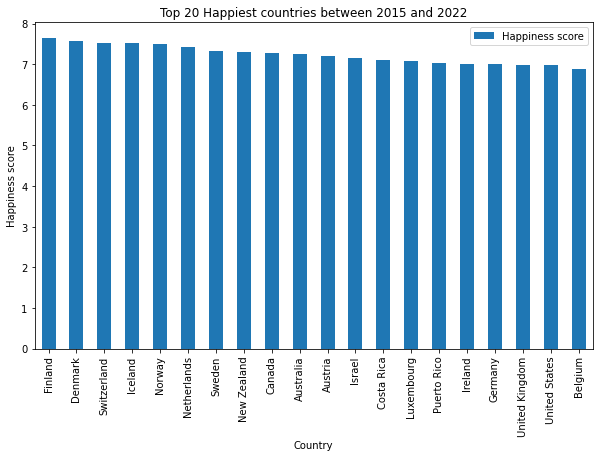

In [50]:
top_20_countries_df.plot(kind='bar', x='Country name',title='Top 20 Happiest countries between 2015 and 2022', 
                          xlabel='Country', ylabel='Happiness score', figsize=(10,6))

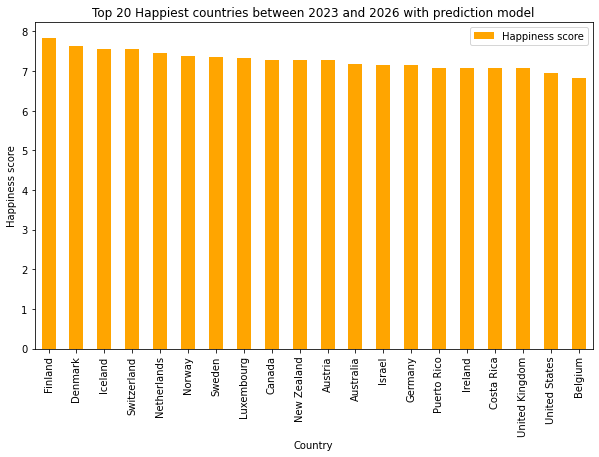

In [51]:
future_predict_bar = new_happy_country_df[['Country name', 'Happiness score']].plot(kind='bar', x='Country name',title='Top 20 Happiest countries between 2023 and 2026 with prediction model', 
                          xlabel='Country', ylabel='Happiness score', color='orange',figsize=(10,6))


In [43]:
# Put parallel plots in a single row
row_of_parallel = pn.Row(dataset_bar_graph,  future_predict_bar)

# Save machine learning model
Save happy_model as an HDFf file.



In [ ]:
import pickle

# Set the file path for the first alternative model
file_path = "happy_model.pkl"

# Save your model to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(happy_xgb_model, file)

# Download the model to your computer
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>